# Author : Akash Skanthan P

## Task 3: Exploratory Data Analysis - Retail
   
  Perform Exploratory Data Analysis on the given dataset and the tasks focuses on a business manager who will try to find out weak areas where he can work to improve the company's profit

### GRIP - The Sparks Foundation

## Importing the libraries and reading the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
print("Data import successful")

Data import successful


In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing and Analysis

In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.duplicated().sum()

17

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [13]:
df.drop_duplicates(subset=None, keep = 'first', inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


<AxesSubplot:>

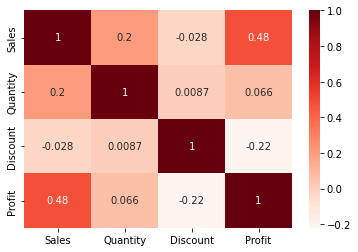

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'Reds')

In [17]:
df = df.drop(['Postal Code'], axis = 1)

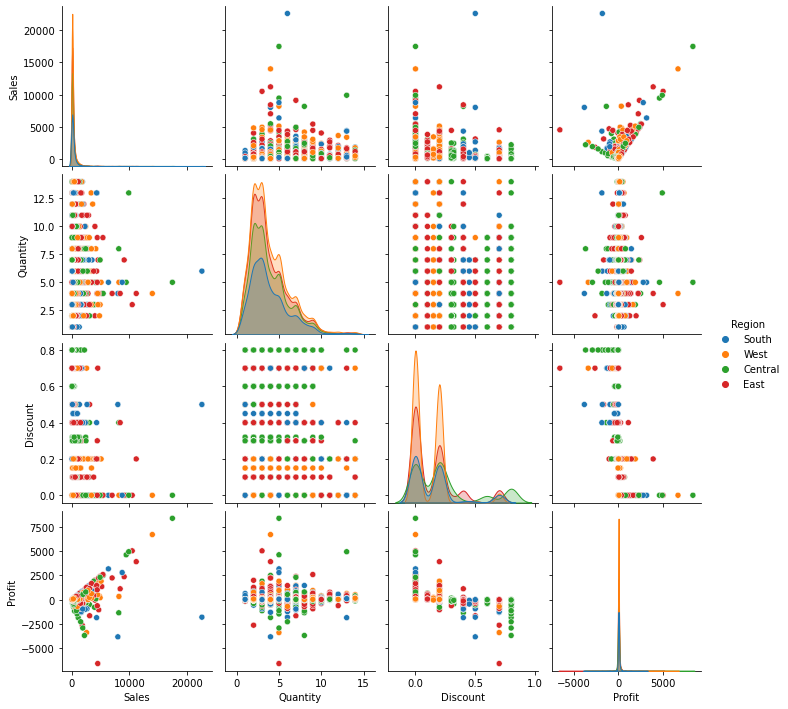

In [18]:
sns.pairplot(df, hue = 'Region')
plt.show()

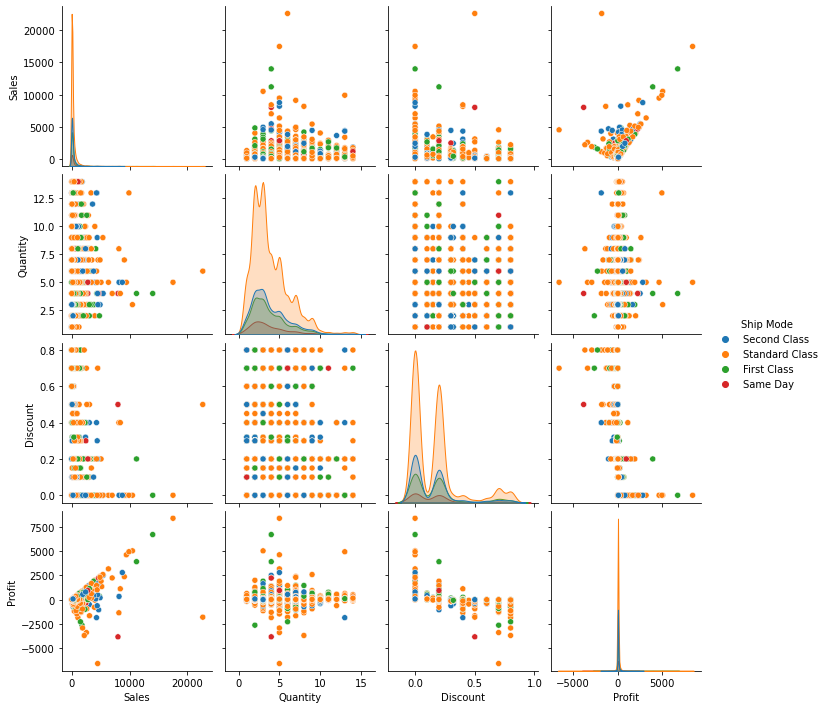

In [19]:
sns.pairplot(df, hue = 'Ship Mode', palette = 'tab10')

## Univariate Analysis
## Ship Mode

In [20]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Shipping mode wise order distribution')

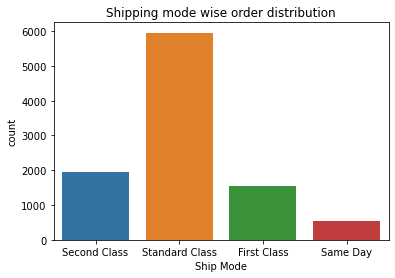

In [21]:
sns.countplot(x=df['Ship Mode'])
plt.title('Shipping mode wise order distribution')

## Observation 1
- 'Standard Class' Shipping mode has the high preference whereas 'Same Day' mode has the least preference


## Segment

In [22]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

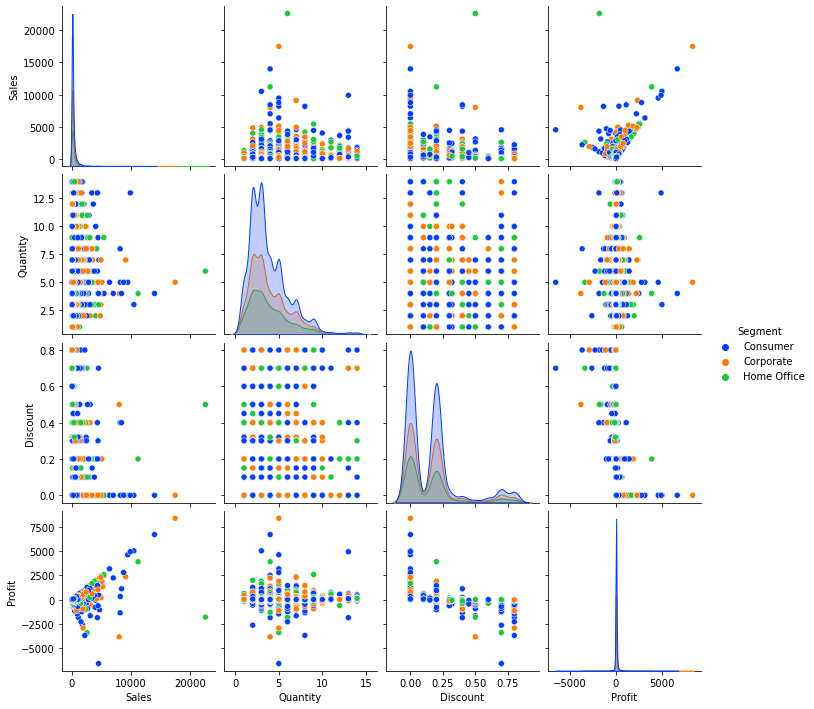

In [23]:
sns.pairplot(df, hue = 'Segment', palette = 'bright')

Text(0.5, 1.0, 'Segment wise distribution')

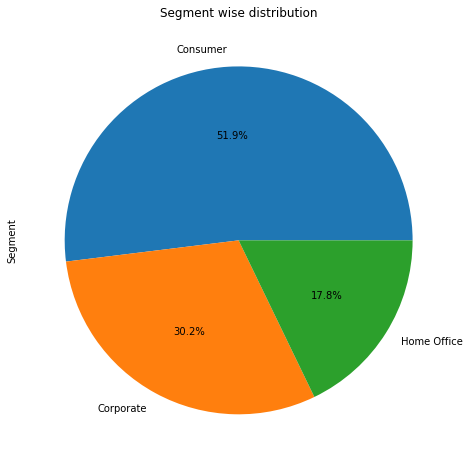

In [24]:
df['Segment'].value_counts().plot(kind= 'pie', figsize = [8,8], autopct = '%1.1f%%')
plt.title('Segment wise distribution')

## Observation 2 
- 50% of people belong to 'Consumer' segment and other 50% to 'Corporate' and 'Home Office' Segments

## Country

In [25]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

## Observation 3
- All the shipments are within the United States

## Category

In [26]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Category wise distribution')

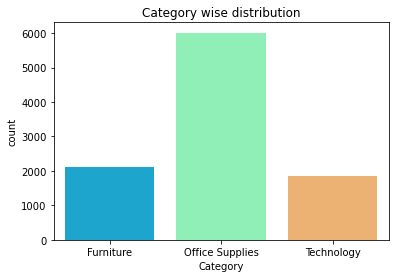

In [27]:
sns.countplot(x='Category', data = df, palette = 'rainbow')
plt.title('Category wise distribution')

## Observation 4
- More than 50% of the categories belong to 'Office Supplies'

## Sub-Category

In [28]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0.5, 1.0, 'Sub-Category wise distribution')

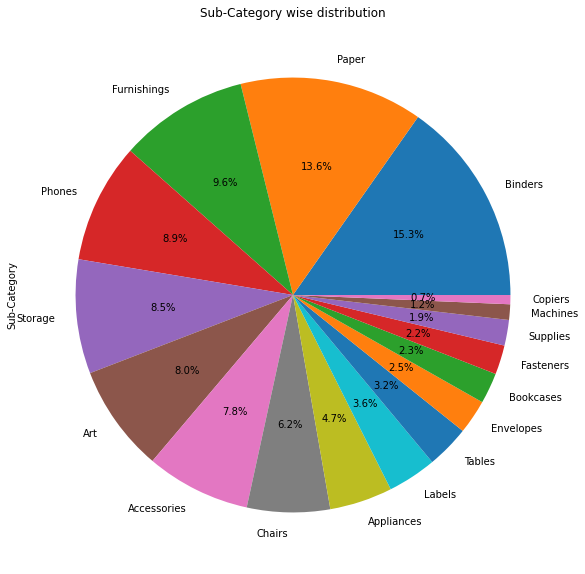

In [29]:
df['Sub-Category'].value_counts().plot(kind = 'pie', figsize = [10, 10], autopct = '%1.1f%%')
plt.title('Sub-Category wise distribution')

## Observation 5
- Binders and paper are the most existing Sub-Category in the Superstore

## City

In [30]:
df['City'].value_counts().head(20)

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 10 Cities having most order placed')

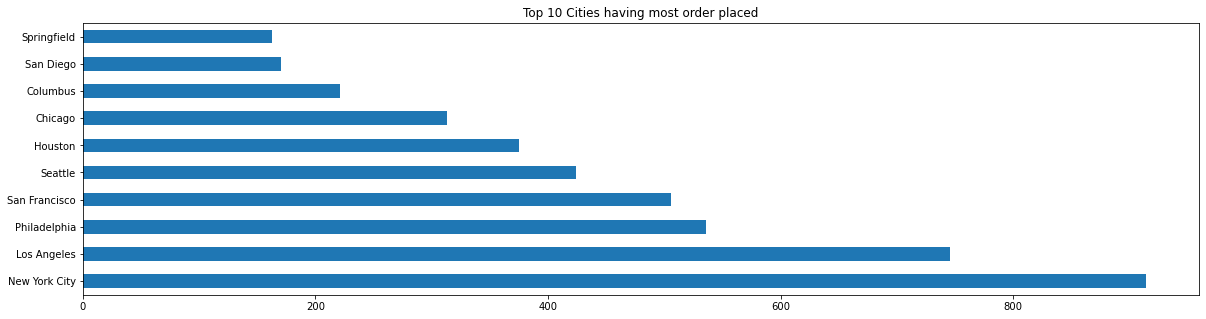

In [31]:
df['City'].value_counts().head(10).plot(kind = 'barh', figsize = [20, 5])
plt.title('Top 10 Cities having most order placed')

## Observation 6
- Most number of orders placed in New York City and Los Angeles 

## State

In [32]:
df['State'].value_counts().head(20)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Arizona            224
Virginia           224
Georgia            184
Tennessee          183
Colorado           182
Indiana            149
Kentucky           139
Massachusetts      135
New Jersey         130
Oregon             123
Name: State, dtype: int64

Text(0.5, 1.0, 'State wise order distribution')

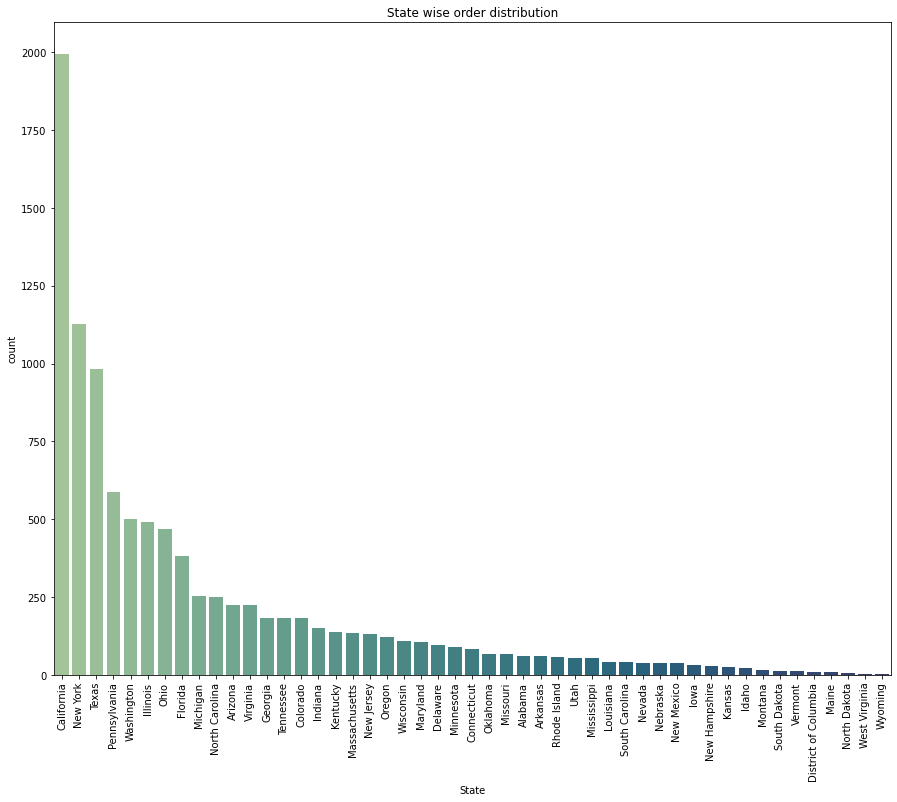

In [33]:
plt.figure(figsize = (15, 12))
sns.countplot(x = 'State', data = df, palette = 'crest', order = df['State'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('State wise order distribution')

## Observation 7
- California has the most number of orders placed

## Region

In [34]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

Text(0.5, 1.0, 'Region wise orders distribution')

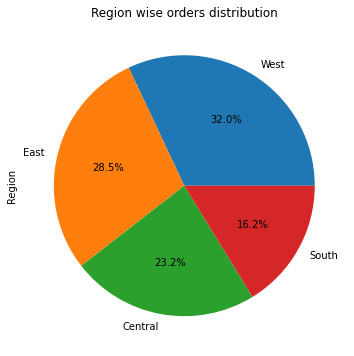

In [35]:
df['Region'].value_counts().plot(kind = 'pie', figsize = [6, 6], autopct = '%1.1f%%')
plt.title('Region wise orders distribution')

## Observation 8
- West region has the maximum sale of 32%

## Bivariate Analysis

Text(0.5, 1.0, 'Profit and Sales in each Category')

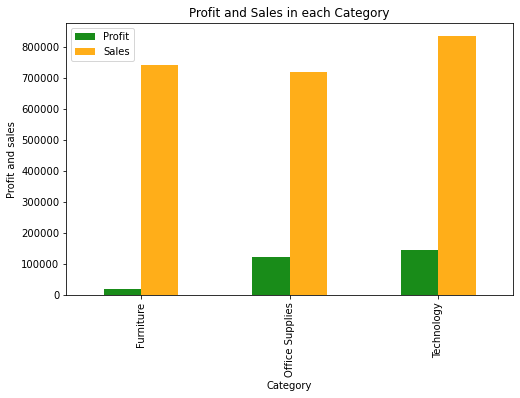

In [38]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','orange'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit and sales')
plt.title("Profit and Sales in each Category")

## Observation  1 
- Technology and Office Supplies have high profit.
- Furniture have less profit.
- Tech Category have high sales.
- Furniture and Office Supplies Category have almost same number of sales but less than Tech Category.

Text(0, 0.5, 'Profit/loss & Sales')

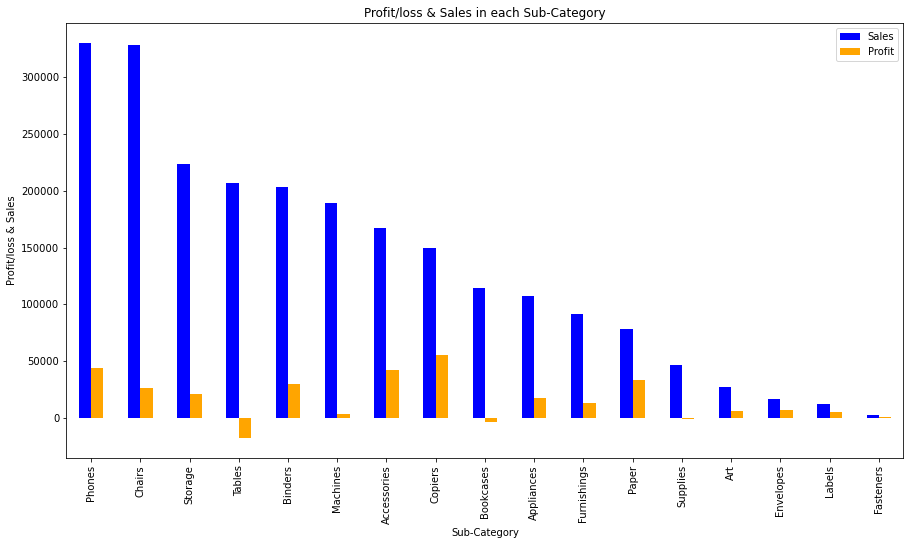

In [45]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales in each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')

## Observation 2
- Phones sub-category have high sales.
- chairs have high sales but less profit compared to phones.
- Tables and Bookcasess sub-categories facing huge loss.
- Copiers. papers and Accessories have high profit percentage.

Text(0, 0.5, 'Profit/loss & Sales')

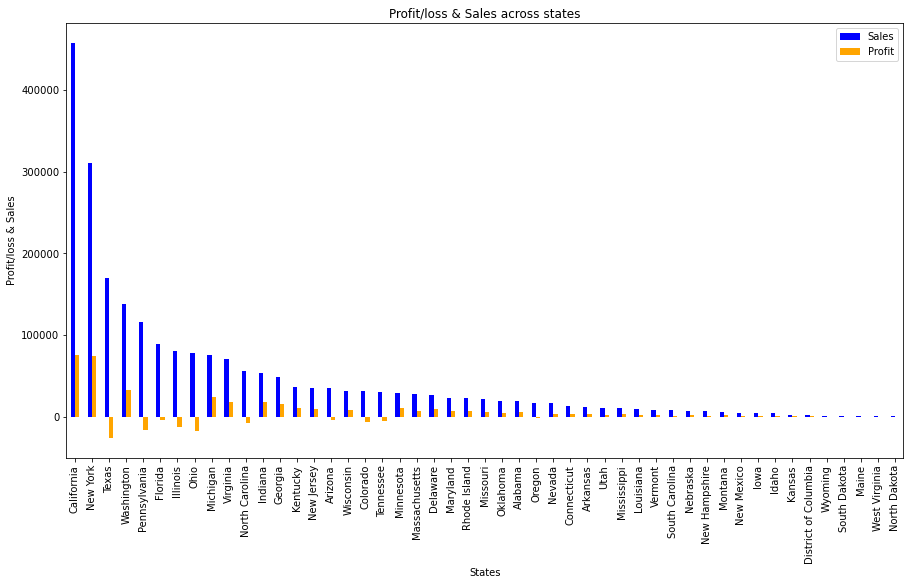

In [44]:
ps1 = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps1[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')

## Observation 3
- high profit is for California and New York.
- loss is for Pennsylvania, Ohio.
- Despite having a good amount of sales in Texas it also faces a huge loss.

Text(0.5, 1.0, 'Profit/Loss and Sales in each Segment')

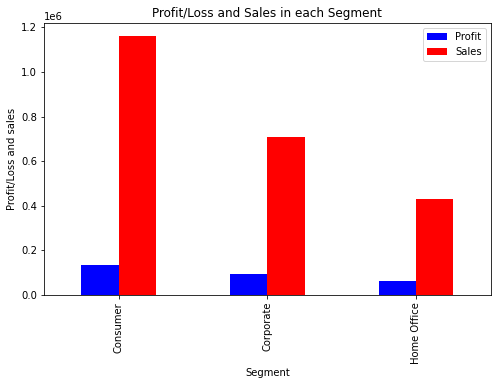

In [51]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.title("Profit/Loss and Sales in each Segment")

## Observation 4
- Profit and sales are maximum in consumer segment and minimum in Home Office segment.

## Impact of Discounts in Sales and Profit

Text(0.5, 1.0, 'Discount vs Profit')

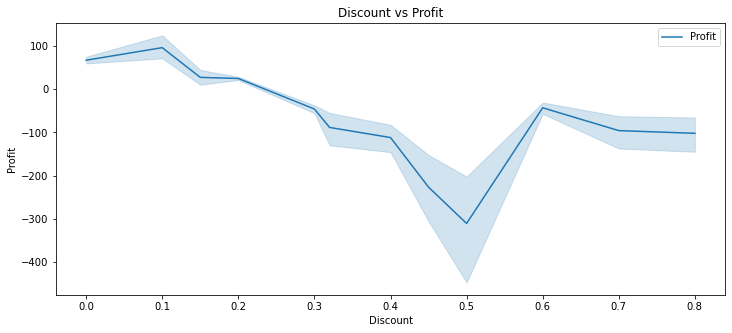

In [56]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.title("Discount vs Profit")

Text(0.5, 1.0, 'Discount vs Sales')

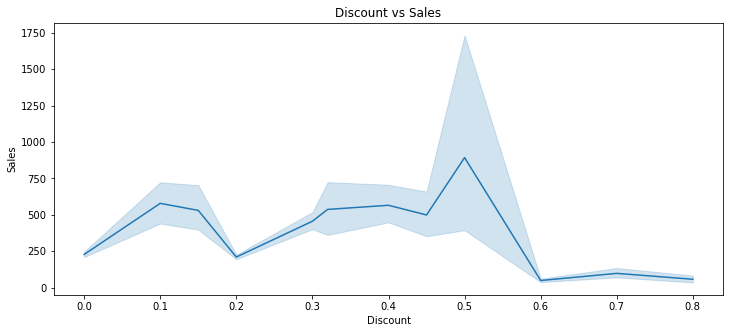

In [55]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount vs Sales')

## Observation 5 - (Line Plots)
-  When 45% to 55% discount is given on products there is a huge amount of sales as well as a huge loss.
- From the above two line plots, when the discount is around 10% there is a decent sales with good amount of profit.

## Conclusion/Suggestion
1. Reduce the discount percentage to 20% to expect a decent amount of sales and profit, if the discount percentage goes high, the sales may increase but it is a real threat to the store resulting in a huge loss.
2. Although the sales of Furniture is high its profit is very low compared to Technology and Office Suppliers.
3. Concentrate more on states like Washington, Michigan and Virginia to expect more profits.
4. With decent number of sales in Texas and Pennsylvania there is a huge loss.